In [9]:
# import
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [16]:
#b. Load dataset from folder
data_dir = "./caltech-101-img"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)
   


num_classes = train_gen.num_classes


Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'map'

(-0.5, 231.5, 299.5, -0.5)

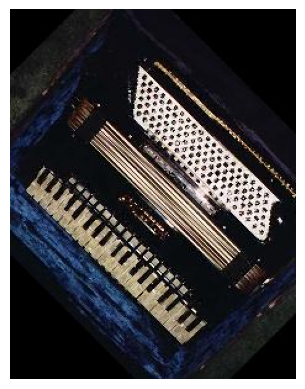

In [11]:
from PIL import Image

img = Image.open("caltech-101-img/accordion/image_0002.jpg")
plt.imshow(img)
plt.axis('off')

In [12]:
# ===========================================
# c. Load pre-trained CNN (VGG16) – Step (a)
#    WITHOUT the top classifier layers
# ===========================================
base_model = VGG16(
    weights='./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 
    include_top=False,
    input_shape=(150, 150, 3)
)



In [13]:
# d. Freeze lower convolutional layers – Step (b)
# ===========================================
for layer in base_model.layers:
    layer.trainable = False



In [14]:
# ===========================================
# e. Add custom classifier – Step (c)
# ===========================================
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 102)            │        13,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,793,510 (56.43 MB)

 Trainable params: 78,822 (307.90 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 20317s 44s/step - accuracy: 0.1450 - loss: 4.3436 - val_accuracy: 0.2875 - val_loss: 3.2970
Epoch 2/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 11522s 25s/step - accuracy: 0.3108 - loss: 3.2069 - val_accuracy: 0.4223 - val_loss: 2.6704
Epoch 3/10
 27/460 ━━━━━━━━━━━━━━━━━━━━ 13:29 2s/step - accuracy: 0.4494 - loss: 2.4401

KeyboardInterrupt: 

In [ ]:
'''
# ===========================================
# g. Fine-tuning – Step (e)
# Optionally unfreeze last few conv layers
# ===========================================
for layer in base_model.layers[-4:]:  # unfreeze last 4 layers
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),   # lower LR for fine tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


# ===========================================
# h. Evaluate model on validation set
# ===========================================
val_loss, val_acc = model.evaluate(val_gen)
print("Validation Accuracy:", val_acc) '''